## Исследование данных о российском кинопрокате



**Цель работы:** изучить рынок российского кинопроката и выявить текущие тренды.

Входные данные опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**План работы:**
* открыть и изучить таблицы с данными, объединить их в один датафрейм;
* провести предобработку данных: избавиться от пустых значений, дубликатов, аномалий, изменить тип данных при необходимости;
* добавить в таблицу новые столбцы для дальнейшего проведения исследовательского анализа данных с их помощью;
* произвести исследовательский анализ данных:
    1. Посмотреть, сколько фильмов выходило в прокат каждый год.
    2. Изучить, как менялась динамика проката по годам.
    3. С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.
    4. Определить, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.
* исследовать фильмы, которые получили государственную поддержку
* сделать выводы.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
df1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [ ]:
df1['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [ ]:
df1['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

In [ ]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [ ]:
df2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


**Приведем колонку "puNumber" вo втором датафрейме к типу object.**

In [ ]:
df2['puNumber'] = df2['puNumber'].astype(str)

**Объединим две таблицы в одну по общему столбцу "puNumber".**

In [ ]:
df = df1.merge(df2, on='puNumber', how='outer')

In [ ]:
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод по первому шагу:** открыли и изучили таблицы с данными, объединили их в одну по общему столбцу, *все объекты из датасета mkrf_movies вошли в получившийся датафрейм*. Теперь он состоит из 15 колонок и 7486 строк, тип данных в которых: float64(4 столбца) и object(12 столбцов). На первый взгляд сразу бросается отсутствие некоторых значений в 11-ти столбцах. Нельзя работать с этими данными, не сделав их предобработку. Далее проведем работу с пропусками и дубликатами, а также обработаем аномальные значения.

### Шаг 2. Предобработка данных

**Заменим название столбца "puNumber" на более правильное "pu_number".**

In [ ]:
df = df.rename(columns={'puNumber' : 'pu_number'})

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

**Заменим значение 'нет' в столбце "pu_number", чтобы произвести преобразование типа. Выберем 32-х разрядный тип для экономии памяти.**

In [ ]:
df['pu_number'] = df['pu_number'].replace({'нет': 0})
df['pu_number'] = df['pu_number'].astype('int32')

**Столбцы "refundable_support", "nonrefundable_support", "budget", "box_office" для удобства восприятия поделим на 1 млн. Для экономии памяти изменим тип на float32.**

In [ ]:
df['refundable_support'] = (df['refundable_support']/1000000).astype('float32')
df['nonrefundable_support'] = (df['nonrefundable_support']/1000000).astype('float32')
df['budget'] = (df['budget']/1000000).astype('float32')
df['box_office'] = (df['box_office']/1000000).astype('float32')

In [ ]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**В столбце "ratings" переведем процентные значения в десятибальную шкалу и изменим тип данных на float32. Значения Nan заменим на 0, т.е. фильм без оценки.**

In [ ]:
df['ratings'] = df['ratings'].fillna('0')
df['ratings'] = df['ratings'].apply(lambda x: (float(x.strip('%')) / 10) if '%' in x else x).astype('float32')
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8], dtype=float32)

**Столбец `show_start_date` имеет тип object, хотя, очевидно, должен быть datetime.Выполним преобразование**

In [ ]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [ ]:
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

7486

**Т.к. исследование не зависит от столбцов "film_studio", "production_country", "director", "producer", а заполнить их чем-либо адекватно невозможно, то оставим данные пропуски без заполнения.**

**Данные в столбцах "refundable_support", "nonrefundable_support", "budget", "financing_source", "genres" и "box_office" важны для дальнейшего исследования, любые попытки заполнить пропуски могут привести к искажению результатов, поэтому пропуски в данных столбцах заполнять не будем.**

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [ ]:
df.duplicated().sum()

0

**Явных дубликатов в датафрейме нет, перейдем к поиску неявных.**

In [ ]:
sorted(df['title'].unique())[0:30]

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

In [ ]:
sorted(df['pu_number'].unique())

[0,
 1811096,
 111000110,
 111000111,
 111000112,
 111000113,
 111000114,
 111000115,
 111000116,
 111000117,
 111000118,
 111000119,
 111000210,
 111000211,
 111000212,
 111000213,
 111000214,
 111000215,
 111000216,
 111000217,
 111000218,
 111000219,
 111000310,
 111000311,
 111000312,
 111000313,
 111000314,
 111000315,
 111000317,
 111000318,
 111000319,
 111000410,
 111000411,
 111000412,
 111000413,
 111000414,
 111000415,
 111000416,
 111000417,
 111000418,
 111000419,
 111000510,
 111000511,
 111000512,
 111000513,
 111000514,
 111000515,
 111000516,
 111000517,
 111000518,
 111000519,
 111000610,
 111000611,
 111000612,
 111000613,
 111000614,
 111000615,
 111000616,
 111000617,
 111000618,
 111000619,
 111000710,
 111000711,
 111000712,
 111000714,
 111000715,
 111000716,
 111000717,
 111000718,
 111000719,
 111000810,
 111000811,
 111000812,
 111000814,
 111000815,
 111000816,
 111000818,
 111000819,
 111000910,
 111000911,
 111000912,
 111000913,
 111000914,
 111000915,
 1

In [ ]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [ ]:
sorted((df['film_studio'].astype(str).unique()))

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [ ]:
sorted((df['production_country'].astype(str).unique()))

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'nan',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Гер

In [ ]:
sorted((df['director'].astype(str).unique()))

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'nan',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басае

In [ ]:
sorted((df['producer'].astype(str).unique()))

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'nan',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Ситер, 

In [ ]:
df['age_restriction'] = df['age_restriction'].str.strip()
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

**Столбец "age_restriction" дубликатов не имеет.**

In [ ]:
sorted((df['genres'].astype(str).unique()))

['nan',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драм

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

**Как можем увидеть в предыдущем подпункте, почти каждый категориальный столбец, за исключением прокатного удостоверения, возростного ограничения и жанра, имеет лишние пробелы в начале строки, создавая неявные дубликаты, что является общей проблемой для этих данных. Избавимся от них, применив метод `strip()`.**

In [ ]:
df['title'] = df['title'].str.strip()
df['type'] = df['type'].str.strip()
df['film_studio'] = df['film_studio'].str.strip()
df['production_country'] = df['production_country'].str.strip()
df['director'] = df['director'].str.strip()
df['producer'] = df['producer'].str.strip()


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


In [ ]:
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,332.000000,332.000000,332.000000,7486.000000,3158.000000
mean,1.351785e+08,11.864458,48.980991,127.229713,5.650067,76.478699
std,3.838218e+07,24.916555,59.980118,188.588333,2.412032,240.353119
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.120250e+08,0.000000,25.000000,42.000000,5.400000,0.086239
50%,1.210155e+08,0.000000,30.000000,68.649918,6.400000,2.327988
75%,1.240033e+08,15.000000,40.375000,141.985321,7.200000,23.979671
max,2.310011e+08,180.000000,400.000000,2305.074219,9.900000,3073.568604


**Рассмотрим возможные аномалии для всех ненулевых значений количественных переменных.**

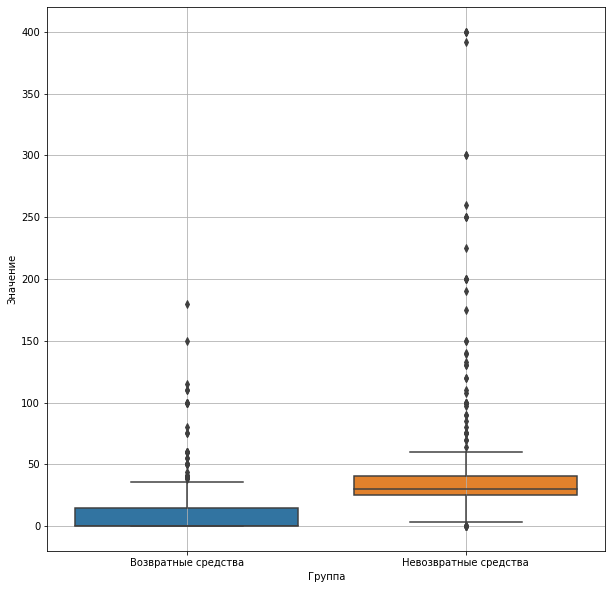

In [ ]:
a = pd.DataFrame({ 'Группа' : 'Возвратные средства', 'Значение': df['refundable_support'] })
b = pd.DataFrame({ 'Группа' : 'Невозвратные средства', 'Значение': df['nonrefundable_support'] })

data = a.append(b)
plt.figure(figsize=(10,10))
sns.boxplot(x='Группа', y='Значение', data=data)
plt.grid(True)
plt.show()

**Можем наблюдать выбросы в возвратных средствах свыше ~40 млн. руб., в невозвратных - свыше ~60 млн. руб. Возможно, это связано с единичными фильмами, на которые возлагались особые надежды. Кучные выбросы до 50 млн. руб. в возвратных и до 100 млн. руб. невозвратных сохраним в датафрейме, остальные выбросы примем  за аномалии и избавимся от них.**

In [ ]:
df = df.query('~(refundable_support > 50)')
df = df.query('~(nonrefundable_support > 100)')

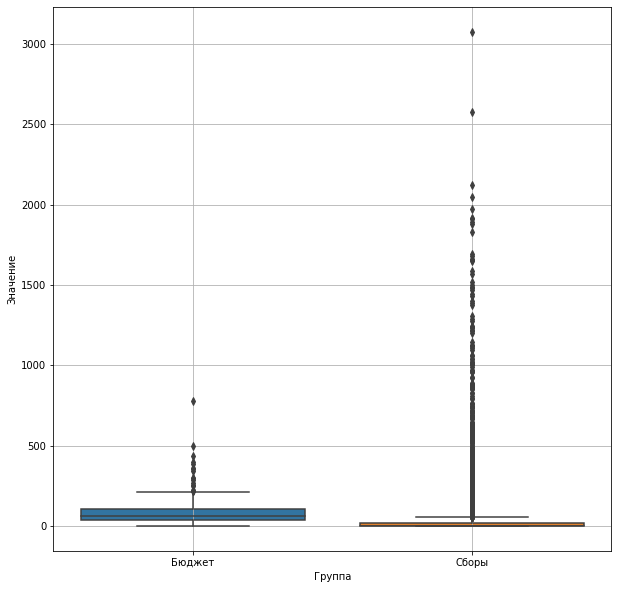

In [ ]:
c = pd.DataFrame({ 'Группа' : 'Бюджет', 'Значение': df['budget'] })
d = pd.DataFrame({ 'Группа' : 'Сборы', 'Значение': df['box_office'] })
data = c.append(d)
plt.figure(figsize=(10,10))
sns.boxplot(x='Группа', y='Значение', data=data)
plt.grid(True)
plt.show()

**Выбросы в сборах могут быть связаны с тем, что есть огромное количество фильмов, сборы которых тяготеют к нулю. Для примера, рассмотрим самый дальний выброс более 3 млрд. руб., проверив данные видим, что число соответствует действительности, значит выбросы в сборах удалять не будем. Выбросы в бюджете не большие и на общий результат исследования влияния не окажут.**

In [ ]:
df[df['box_office'] > 3000]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25.0,35.0,160.0,Фонд кино,6.8,комедия,3073.568604


**Согласно данным Кинопоиска, самый рейтинговый фильм имеет оценку 9,1. Избавимся от аномалий, оставив значения меньше либо равные 9,1.**

In [ ]:
df = df.query('ratings <= 9.1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7433 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7433 non-null   object        
 1   pu_number              7433 non-null   int32         
 2   show_start_date        7433 non-null   datetime64[ns]
 3   type                   7433 non-null   object        
 4   film_studio            7415 non-null   object        
 5   production_country     7431 non-null   object        
 6   director               7424 non-null   object        
 7   producer               6865 non-null   object        
 8   age_restriction        7433 non-null   object        
 9   refundable_support     291 non-null    float32       
 10  nonrefundable_support  291 non-null    float32       
 11  budget                 291 non-null    float32       
 12  financing_source       291 non-null    object        
 13  rat

**Если бюджет фильма меньше суммы его поддержки, избавимся от таких строк.**

In [ ]:
df = df.query('~(budget < (refundable_support + nonrefundable_support))')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7420 non-null   object        
 1   pu_number              7420 non-null   int32         
 2   show_start_date        7420 non-null   datetime64[ns]
 3   type                   7420 non-null   object        
 4   film_studio            7402 non-null   object        
 5   production_country     7418 non-null   object        
 6   director               7411 non-null   object        
 7   producer               6852 non-null   object        
 8   age_restriction        7420 non-null   object        
 9   refundable_support     278 non-null    float32       
 10  nonrefundable_support  278 non-null    float32       
 11  budget                 278 non-null    float32       
 12  financing_source       278 non-null    object        
 13  rat

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
df['year'] = df['show_start_date'].dt.year.astype(int)

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [ ]:
def new_column(row):
        row = str(row).split(',')
        return row[0]

df['head_director'] = df['director'].apply(new_column)
df['head_genre'] = df['genres'].apply(new_column)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
def supp_p(row):
    support_part = (row['refundable_support'] + row['nonrefundable_support']) / row['budget']
    try:
        if support_part > 0:
            return (support_part)
        else:
            return 0
    except:
        pass
df['support_part'] = df.apply(supp_p, axis=1)
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,head_director,head_genre,support_part
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,0.0
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,0.0
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,0.0
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,0.0
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,0.0
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма,0.0
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",0.0027,2013,В.Меньшов,мелодрама,0.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл,0.0
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,0.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7420 non-null   object        
 1   pu_number              7420 non-null   int32         
 2   show_start_date        7420 non-null   datetime64[ns]
 3   type                   7420 non-null   object        
 4   film_studio            7402 non-null   object        
 5   production_country     7418 non-null   object        
 6   director               7411 non-null   object        
 7   producer               6852 non-null   object        
 8   age_restriction        7420 non-null   object        
 9   refundable_support     278 non-null    float32       
 10  nonrefundable_support  278 non-null    float32       
 11  budget                 278 non-null    float32       
 12  financing_source       278 non-null    object        
 13  rat

In [ ]:
a, b = len(temp), len(df)
print(len(temp), len(df), round((a-b)/a*100, 2))

7486 7420 0.88


**Вывод по второму шагу:** на данном этапе обработали пропущенные значения или оставили пропуски без изменений, чтобы не нарушить адекватность данных в них, обнаружили и удалили неявные дубликаты, общей проблемой для категориальных переменных явилось наличие лишних пробелов в начале строки, от них избавились. Проверили количественные значения, избавились от аномалий среди них. Добавили в таблицу столбцы, необходимые для проведения дальнейшего исследования. В результате всех действий датафрейм увеличился на 4 столбца и скоратился на 66 строк, что составляет 0,88% от общего числа строк, и их потеря не окажет ощутимого влияния на объем выборки.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Если в столбце "box_office" значение равное 0 либо отсутствующее вовсе, значит, что фильм не был в прокате в Российских кинотеатрах или данные об этом отсутствуют. Рассмотрим только данные, имеющие информацию о прокате в кинотеатрах.**

In [ ]:
df_q = df.query('box_office > 0')
display(df_q['box_office'].count() / df['box_office'].count())
films_per_year = df_q.groupby('year')['title'].count()
films_per_year

0.9922605611093196

year
2010    101
2011    109
2012    123
2013    177
2014    271
2015    453
2016    512
2017    349
2018    464
2019    518
Name: title, dtype: int64

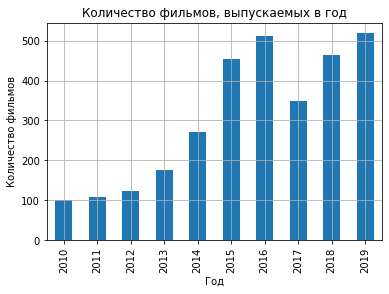

In [ ]:
films_per_year.plot(kind='bar', grid=True)
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов, выпускаемых в год');

**Можем наблюдать, сколько фильмов выходило в прокат каждый год. Количество фильмов из года в год росло, за исключением просадки в 2017 году. Доля фильмов с указанной информацией о прокате составляет 99,2%.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

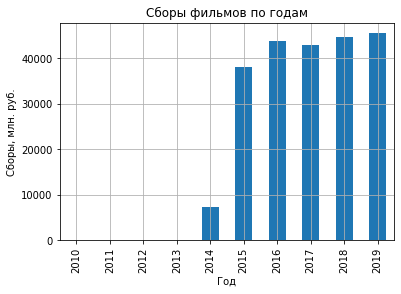

In [ ]:
df_q.groupby('year')['box_office'].sum().plot(kind='bar', grid=True)
plt.xlabel('Год')
plt.ylabel('Сборы, млн. руб.')
plt.title('Сборы фильмов по годам');

**По графику видно, что минимальная сумма сборов была в 2010 году. В целом наблюдается резкий рост сборов начиная с 2014 года. 2019 год был самым "урожайным" для киноделов.**

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

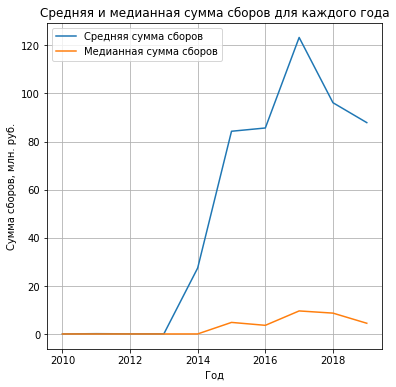

In [ ]:
df_q.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).plot(grid=True, figsize=(6,6))
plt.xlabel('Год')
plt.ylabel('Сумма сборов, млн. руб.')
plt.legend(['Средняя сумма сборов', 'Медианная сумма сборов'])
plt.title('Средняя и медианная сумма сборов для каждого года');

**Из графика можем сделать вывод, что до 2013 года медианное и среднее значения сборов практически не менялись и были равны друг другу. Далее среднее значение стремительно росло до 2017 года, после чего несколько снизилось. Медианное значение практически не менялось вплоть до 2014 года, после чего пошел небольшой рост, перешедший в плавный спад после 2017 года.**

**Как мы видели в пункте 2.5, большое количество сумм сборов выходит за пределы четвертого квартиля, этими выбросами и объясняется огромное превосходство среднего значения над медианным. При этом динамика изменения величин схожа.**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [ ]:
df_q['age_restriction'] = df_q['age_restriction'].apply(lambda x: x.partition('-')[0])

/tmp/ipykernel_206/1990221205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['age_restriction'] = df_q['age_restriction'].apply(lambda x: x.partition('-')[0])


In [ ]:
df_y = df_q.query('year >= 2015')
restr_by_year = df_y.pivot_table(index=['age_restriction', 'year'], values='box_office', aggfunc=['sum', 'count', 'mean'])
restr_by_year.groupby('age_restriction').sum()

,sum,count,mean
,box_office,box_office,box_office
age_restriction,,,
«0+»,809.077393,90,102.577370
«12+»,52693.113281,331,804.307678
«16+»,73955.421875,791,486.072052
«18+»,40756.070312,790,256.617828
«6+»,46937.859375,294,816.891235


In [ ]:
restr_by_year

sum      count        mean
                        box_office box_office  box_office
age_restriction year                                     
«0+»            2015    379.054565         38    9.975121
                2016    150.228851         41    3.664118
                2017    229.598923          3   76.532974
                2018     32.449001          5    6.489800
                2019     17.746067          3    5.915356
«12+»           2015  13419.509766         71  189.007172
                2016  10386.151367         75  138.482010
                2017   6246.302734         38  164.376389
                2018  11087.301758         64  173.239090
                2019  11553.848633         83  139.203003
«16+»           2015  10781.600586        164   65.741470
                2016  16199.571289        178   91.008827
                2017  18182.816406        119  152.796768
                2018  16278.406250        155  105.021973
                2019  12513.029297        175   71.503021
«18+»           2015   5430.350586        131   41.453060
                2016   6793.929688        151   44.992912
                2017   9651.496094        147   65.656433
                2018   8758.498047        178   49.205048
                2019  10121.795898        183   55.310364
«6+»            2015   8164.402344         49  166.620453
                2016  10310.971680         67  153.895096
                2017   8707.015625         42  207.309891
                2018   8449.565430         62  136.283310
                2019  11305.905273         74  152.782501

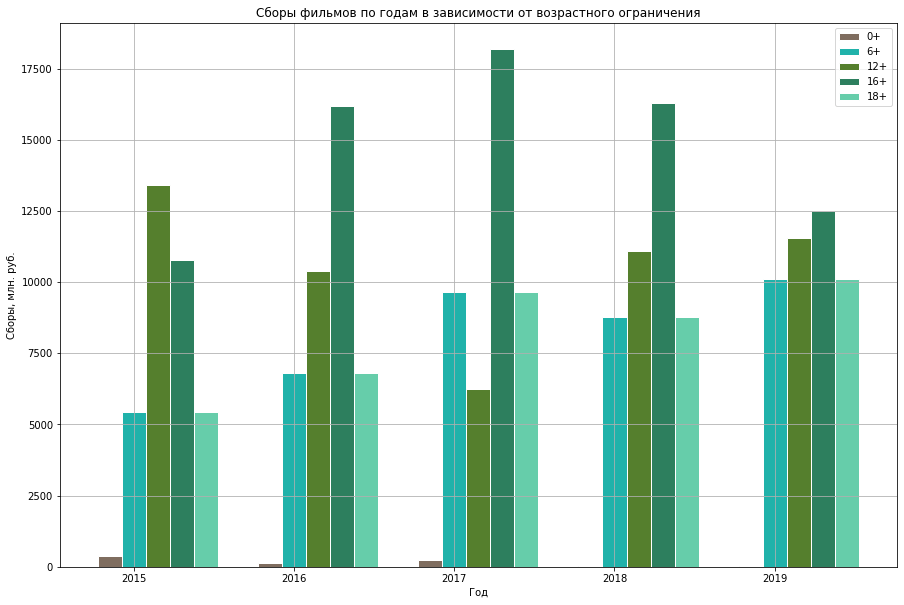

In [ ]:
barWidth = 0.15

r1 = np.arange(len(restr_by_year.iloc[0:5, 0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

plt.figure(figsize=(15, 10))
plt.bar(r1, restr_by_year.iloc[0:5, 0], color='#7f6d5f', width=barWidth, edgecolor='white', label='0+')
plt.bar(r2, restr_by_year.iloc[15:20, 0], color='#20B2AA', width=barWidth, edgecolor='white', label='6+')
plt.bar(r3, restr_by_year.iloc[5:10, 0], color='#557f2d', width=barWidth, edgecolor='white', label='12+')
plt.bar(r4, restr_by_year.iloc[10:15, 0], color='#2d7f5e', width=barWidth, edgecolor='white', label='16+')
plt.bar(r5, restr_by_year.iloc[15:20, 0], color='#66CDAA', width=barWidth, edgecolor='white', label='18+')
plt.bar(2, 0, color='white')

plt.xlabel('Год')
plt.ylabel('Сборы, млн. руб.')
plt.title('Сборы фильмов по годам в зависимости от возрастного ограничения');
plt.xticks([r + barWidth for r in range(len(restr_by_year.iloc[0:5, 0]))], ['2015', '2016', '2017', '2018', '2019'])
plt.legend()

plt.grid()
plt.show()

**Видим, что фильмы с возрастным ограничением 0+ с годами все больше теряли в сборах, но это связано и с тем, что количество фильмов 0+, выходивших в прокат, также уменьшалось.**

**Сборы фильмов 6+ стабильно росли, в 2017 году, несмотря на сокращение их количества в прокате, показали отличный результат по выручке.**

**Выручка фильмов 12+ падала к 2017 году, в который было выпущено наименьшее их количество, после чего наметился рост выручки.**

**Фильмы 16+ за указанный период имели изменение выручки по парраболе с пиком в 2017 году, не завися от количества выпущенных картин.**

**Сборы фильмов 18+ за период стабильно росли с небольшой просадкой в 2018 году.**

**За весь указанный период больше всего собрали фильмы 16+, меньше - 0+. По средней же выручке лидером являются фильмы 6+, аутсайдером - 0+.**

**Вероятно, динамика сборов фильмов с различным возрастным ограничением по годам связана с ростом запроса аудитории на более взрослые картины, и с попытками производителей кино удовлетворить данный запрос.**

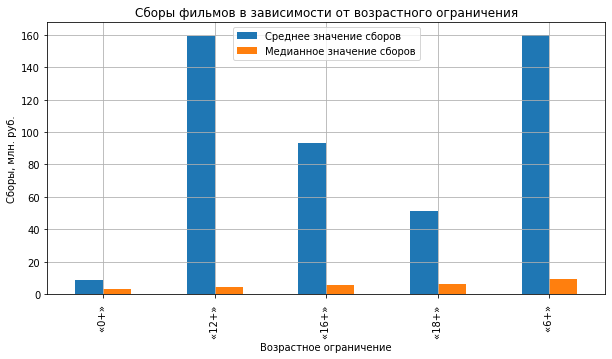

In [ ]:
bo_by_restr = df_y.pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'median'])\
              .plot(kind='bar', figsize=(10,5))

plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы, млн. руб.')
plt.title('Сборы фильмов в зависимости от возрастного ограничения');
plt.legend(['Среднее значение сборов', 'Медианное значение сборов'])

plt.grid()
plt.show()

**Видим, что наибольшее среднее значение сборов в категориях 6+ и 12+, наименьшее - 0+. Наибольшее медианное значение в категории 6+, наименьшее так же, как и у среднего 0+. Здесь также можем наблюдать большую разницу между средним и медианным значениями, что говорит о больших выбросах данных "вверх".**

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим датасет с фильмами с господдержкой.

Произведем исследования:
- зависимости государственной поддержки от года;
- жанров, которые наиболее часто поддерживаются государством;
- возрастных ограничений поддерживаемых фильмов;
- источников государственного финансирования;
- динамики доли окупаемости фильмов по годам;
- динамики изменения среднего рейтинга по годам;
- рейтинга фильмов с господдержкой в зависимости от жанра.

In [ ]:
df_support = df.query('refundable_support > 0 or nonrefundable_support > 0')

**Посмотрим, как выделялись средства на поддержку кино по годам.**

In [ ]:
support_by_year = df_support.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], aggfunc=['sum', 'count', 'mean'])
support_by_year

sum                                    count  \
     nonrefundable_support refundable_support nonrefundable_support   
year                                                                  
2013             26.500000           0.000000                     1   
2014            478.002289          71.000000                    15   
2015           2310.088379         507.153107                    77   
2016           1459.551025         295.500000                    48   
2017           1034.624756         339.346893                    33   
2018           1841.000000         282.000000                    46   
2019           1966.000000         248.000000                    58   

                                         mean                     
     refundable_support nonrefundable_support refundable_support  
year                                                              
2013                  1             26.500000           0.000000  
2014                 15             31.866819           4.733333  
2015                 77             30.001148           6.586404  
2016                 48             30.407312           6.156250  
2017                 33             31.352266          10.283238  
2018                 46             40.021740           6.130435  
2019                 58             33.896553           4.275862

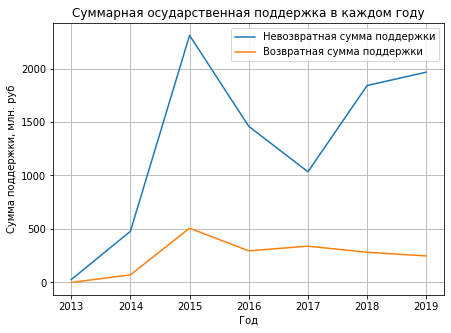

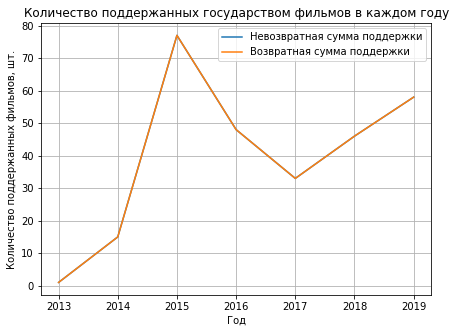

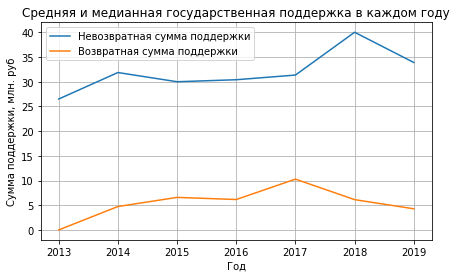

In [ ]:
support_by_year['sum'].plot(grid=True, figsize=(7, 5))
plt.xlabel('Год')
plt.ylabel('Сумма поддержки, млн. руб')
plt.legend(['Невозвратная сумма поддержки', 'Возвратная сумма поддержки'])
plt.title('Суммарная осударственная поддержка в каждом году')
support_by_year['count'].plot(grid=True, figsize=(7, 5))
plt.xlabel('Год')
plt.ylabel('Количество поддержанных фильмов, шт.')
plt.legend(['Невозвратная сумма поддержки', 'Возвратная сумма поддержки'])
plt.title('Количество поддержанных государством фильмов в каждом году')
support_by_year['mean'].plot(grid=True,figsize=(7, 4))
plt.xlabel('Год')
plt.ylabel('Сумма поддержки, млн. руб')
plt.legend(['Невозвратная сумма поддержки', 'Возвратная сумма поддержки'])
plt.title('Средняя и медианная государственная поддержка в каждом году');

**До 2013 года господдержка фильмов отсутствовала (исходя из этого объясняется изменение медианного и среднего значений сборов, выявленное в п. 1.3). Из графиков видно, что суммарная государственная поддержка фильмов росла начиная с 2013 года, как возвратных, так и не возвратных средств. Количество фильмов с господдержкой росло, и видно, что число возвратных и невозвратных средств совпадает, из чего можно сделать вывод, что финансировались одни и те же фильмы, просто имея возвратную и невозвратную части. Средняя величина господдержки так же росла, не считая резкого спада невозвратных средств господдержки на старте.**

**Вернувшись к п. 1.3. видим, что начиная с 2014 года господдержка начала давать свои плоды. Если при ее отсутствии сборы были очень маленькими, то с ростом гоподдержки рос и боксофис. И теперь видим, с чем была связана просадка количества фильмов в 2017 году, в этом году было сокращение их поддержки.**

**Посмотрим, какие типы и жанры наиболее часто поддерживаются государством.**

In [ ]:
df_support.groupby('type')['refundable_support'].count()

type
Анимационный       17
Документальный      1
Художественный    260
Name: refundable_support, dtype: int64

In [ ]:
df_support.groupby('head_genre')['refundable_support'].count()

head_genre
nan            15
биография       3
боевик          5
военный         9
детектив        4
детский         4
драма          83
история         1
комедия        66
криминал        2
мелодрама      14
мультфильм     18
мюзикл          3
приключения     5
реальное ТВ     1
семейный        6
спорт           2
триллер        13
ужасы          10
фантастика      6
фэнтези         8
Name: refundable_support, dtype: int64

**Видим, что наиболее часто поддерживаются художественные фильмы в жанрах драма и комедия.**

In [ ]:
df_support.groupby('age_restriction')['refundable_support'].count()

age_restriction
«0+» - для любой зрительской аудитории      8
«12+» - для детей старше 12 лет            88
«16+» - для детей старше 16 лет           112
«18+» - запрещено для детей                27
«6+» - для детей старше 6 лет              43
Name: refundable_support, dtype: int64

**Основные возрастные ограничения для фильмов с господдержкой составляют 12+ и 16+.**

In [ ]:
df_support.groupby('financing_source')['nonrefundable_support'].count()

financing_source
Министерство культуры               162
Министерство культуры, Фонд кино     19
Фонд кино                            97
Name: nonrefundable_support, dtype: int64

**Видим, что при совместной поддержке Министерства культуры и Фонда кино выходит гораздо меньше фильмов, чем при их индивидуальной поддержке тех или иных проектов.**

/tmp/ipykernel_206/627054505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['payback'] = df.apply(payback, axis=1)


0.6867924528301886

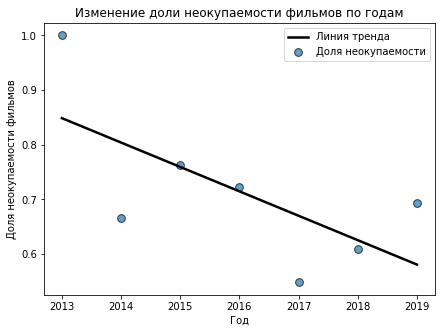

In [ ]:
def payback(row):
    try:
        if (row['refundable_support'] > 0) or (row['nonrefundable_support'] > 0):
            return(row['box_office'] - (row['refundable_support'] + row['nonrefundable_support']))
        else:
            pass
    except:
        pass
df_support['payback'] = df.apply(payback, axis=1)

display(((df_support['payback'] < 0).sum()) / (df_support['payback'].count()))

fig, ax = plt.subplots(figsize = (7, 5))
x = [i for i in range(2013, 2020, 1)]
y = ((df_support[df_support['payback'] < 0].groupby('year')['payback'].count()) / (df_support.groupby('year')['payback'].count()))
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(x, y, deg=1)
xseq = np.linspace(2013, 2019, num=10)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xticks(x)
plt.xlabel('Год')
plt.ylabel('Доля неокупаемости фильмов')
plt.legend(['Линия тренда', 'Доля неокупаемости'])
plt.title('Изменение доли неокупаемости фильмов по годам');

In [ ]:
df_support['year'].value_counts()

2015    77
2019    58
2016    48
2018    46
2017    33
2014    15
2013     1
Name: year, dtype: int64

**68,7% фильмов с господдержкой не окупаются. В 2013 году вышел один фильм, коэффициент неокупаемости которого близок к 1, из-за чего тренд видится отрицательным, но если брать промежуток времени, начиная с 2014, когда в год выходило по несколько фильмов, можно сказать, что в зависимости от года имеется тренд на увеличение окупаемости фильмов с господдержкой.**

5.9775662

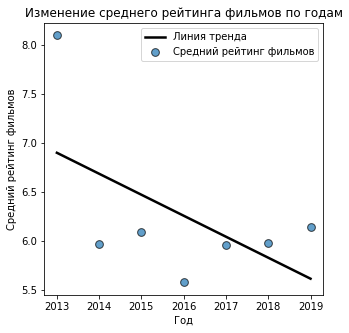

In [ ]:
df_rate = df_support[df_support['ratings'] > 0]
display(df_rate['ratings'].mean())
df_rate_pv = df_rate.pivot_table(index='year', values='ratings')

fig, ax = plt.subplots(figsize = (5, 5))
x = [i for i in range(2013, 2020, 1)]
ax.scatter(x, df_rate_pv['ratings'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(x, df_rate_pv['ratings'], deg=1)
xseq = np.linspace(2013, 2019, num=10)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xlabel('Год')
plt.ylabel('Средний рейтинг фильмов')
plt.legend(['Линия тренда', 'Средний рейтинг фильмов'])
plt.title('Изменение среднего рейтинга фильмов по годам');

**Средний рейтинг фильмов с господдержкой составляет 5.98, что является небольшой цифрой. Но если на графике провести линию тренда, видим, что этот рейтинг постепенно растет. Если не учитывать 2013 год, в котором вышел один фильм с рейтингом 8,1, задрав планку на графике (авторское кино, судя по оценке и сборам).**

In [ ]:
df_rate.pivot_table(index='age_restriction', values='ratings')

,ratings
age_restriction,
«0+» - для любой зрительской аудитории,6.414286
«12+» - для детей старше 12 лет,6.025926
«16+» - для детей старше 16 лет,5.929630
«18+» - запрещено для детей,6.264000
«6+» - для детей старше 6 лет,5.764286


**Наибольший средний рейтинг имеют фильмы с возрастным ограничением 0+, но в своем количестве они уступают фильмам с ограничением 18+, которые имеют второй по величине рейтинг. Наименьший рейтинг у категории 6+.**

In [ ]:
df_rate.pivot_table(index='head_genre', values='ratings')

,ratings
head_genre,
биография,6.900000
боевик,6.340000
военный,6.466667
детектив,7.000000
детский,7.125000
драма,6.366265
история,3.200000
комедия,5.498485
криминал,7.000000


**Наибольший средний рейтинг имеют фильмы в жанрах детский, криминал и детектив, наименьший - история.**

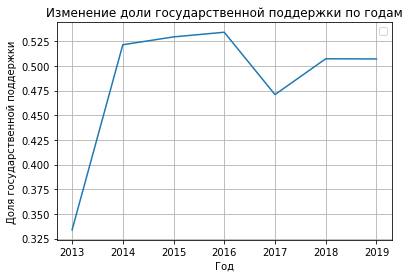

In [ ]:
df_support.pivot_table(index='year', values='support_part', aggfunc='mean').plot(grid=True)
plt.xlabel('Год')
plt.ylabel('Доля государственной поддержки')
plt.legend([])
plt.title('Изменение доли государственной поддержки по годам');

**Видим, что доля господдержки росла, достигнув пика в 2016 году, после чего началось ее уменьшение и стабилизация.**

### Шаг 5. Напишите общий вывод

**Вывод:** открыли и изучили таблицы с данными, объединили их в одну по общему столбцу. Все объекты из датасета mkrf_movies вошли в получившийся датафрейм. Теперь он состоит из 15 колонок и 7486 строк, тип данных в которых: float64(4 столбца) и object(12 столбцов)

На втором шаге обработали пропущенные значения или оставили пропуски без изменений, чтобы не нарушить адекватность данных в них, обнаружили и удалили неявные дубликаты, общей проблемой для категориальных переменных явилось наличие лишних пробелов в начале строки, от них избавились. Проверили количественные значения, избавились от аномалий среди них. Добавили в таблицу столбцы: год проката, главный режиссер фильма, основной жанр фильма и долю господдержки в общем бюджете. Эти данные необходимы для проведения дальнейшего исследования.

Количество фильмов из года в год росло, за исключением просадки в 2017 году. Минимальная сумма сборов была в 2010 году. В целом наблюдается резкий рост сборов начиная с 2014 года. 2019 год был самым "урожайным" для киноделов. До 2013 года медианное и среднее значения сборов практически не менялись и были равны друг другу. Далее среднее значение стремительно росло до 2017 года, после чего несколько снизилось. Медианное значение практически не менялось вплоть до 2014 года, после чего пошел небольшой рост, перешедший в плавный спад после 2017 года. Данные изменения коррелируют с появлением и изменением господдержки в фильмах. Большое количество сумм сборов выходит за пределы четвертого квартиля, этими выбросами и объясняется огромное превосходство среднего значения над медианным.

Фильмы с возрастным ограничением 0+ с годами все больше теряли в сборах, но это связано и с тем, что количество фильмов 0+, выходивших в прокат, также уменьшалось. Сборы фильмов 6+ стабильно росли, в 2017 году, несмотря на сокращение их количества в прокате, показали отличный результат по выручке. Выручка фильмов 12+ падала к 2017 году, в который было выпущено наименьшее их количество, после чего наметился рост выручки. Фильмы 16+ за указанный период имели изменение выручки по парраболе с пиком в 2017 году, не завися от количества выпущенных картин.Сборы фильмов 18+ за период стабильно росли с небольшой просадкой в 2018 году. За весь указанный период больше всего собрали фильмы 16+, меньше - 0+. Вероятно, динамика сборов фильмов с различным возрастным ограничением по годам связана с ростом запроса аудитории на более взрослые картины, и с попытками производителей кино удовлетворить данный запрос. Наибольшее среднее значение сборов в категориях 6+ и 12+, наименьшее - 0+. Наибольшее медианное значение в категории 6+, наименьшее так же, как и у среднего 0+. Здесь также можем наблюдать большую разницу между средним и медианным значениями, что говорит о больших выбросах данных "вверх".

До 2013 года господдержка фильмов отсутствовала. Суммарная государственная поддержка фильмов росла начиная с 2013 года, как возвратных, так и не возвратных средств. Количество фильмов с господдержкой росло, и видно, что число возвратных и невозвратных средств совпадает, из чего можно сделать вывод, что финансировались одни и те же фильмы, просто имея возвратную и невозвратную части. Средняя величина господдержки так же росла, не считая резкого спада невозвратных средств господдержки на старте. В 2013 году при господдержке была выпущена лишь одна картина, с высоким общим рейтингом, но очень маленькими сборами. Отбросив данный факт, начиная с 2014 года господдержка начала давать свои плоды. Если при ее отсутствии сборы были очень маленькими, то с ростом гоподдержки рос и боксофис. И теперь видим, с чем была связана просадка количества фильмов в 2017 году, в этом году было сокращение их поддержки. Наиболее часто поддерживаются художественные фильмы в жанрах драма и комедия. Основные возрастные ограничения для фильмов с господдержкой составляют 12+ и 16+. 68,7% фильмов с господдержкой не окупаются. В зависимости от года можем наблюдать тренд на рост окупаемости фильмов с господдержкой. Средний рейтинг фильмов с господдержкой составляет 5.98, что мало. Но из года в год средний рейтинг постепенно растет. Наибольший средний рейтинг имеют фильмы с возрастным ограничением 0+, но в своем количестве они уступают фильмам с ограничением 18+, которые имеют второй по величине рейтинг. Наименьший рейтинг у категории 6+. Наибольший средний рейтинг имеют фильмы в жанрах детский, криминал и детектив, наименьший - история. Видим, что доля господдержки росла, достигнув пика в 2016 году, после чего началось ее уменьшение и стабилизация.

68,7% фильмов с господдержкой не окупаются. Необходимо работать над уменьшением данной доли. Нужно продолжать тенденцию на уменьшение сумм и доли господдержки, при этом более точечено и качественно выбирать фильмы, которые её заслуживают. Как мы можем увидеть, средний рейтинг фильмов с поддержкой из года в год растет, нужно уменьшить финансирование низкорейтинговых жанров, и сделать упор на детское кино, а также криминал и детектив с рейтингом 18+, которые пользуются спросом у зрителя.